## Reinforcement Learning - Tetris

The current project is a reinforcement learning agent that learns to play Tetris. It was developed for the Reinformcement Learning course at FGV-EMAp. The students are:

- Bruno Lunardon
- George Dutra
- Zuilho Segundo

We choosed 

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque
from IPython.display import clear_output
from tetris import Tetris
import cv2

In [3]:
env = Tetris(width=10, height=20, block_size=30)
env.reset()

tensor([0., 0., 0., 0.])

In [35]:
out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"MJPG"), 300,
                          (int(1.5*10*30), 20*30))
while True:
    next_steps = env.get_next_states()
    next_actions, next_states = zip(*next_steps.items())
    print(next_actions)
    next_states = torch.stack(next_states)
    if torch.cuda.is_available():
        next_states = next_states.cuda()
    print(next_states)
    index = random.randint(0, len(next_states) - 1)
    action = next_actions[index]
    _, done = env.step(action, render=True, video=out)

    if done:
        env.reset()
    break

((0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3))
tensor([[ 0., 22., 15., 58.],
        [ 0., 18., 18., 54.],
        [ 0., 22., 20., 58.],
        [ 0., 19., 20., 55.],
        [ 0., 16., 22., 52.],
        [ 0., 18., 22., 54.],
        [ 0., 17., 20., 53.],
        [ 0., 21., 13., 57.],
        [ 0., 16., 14., 52.],
        [ 0., 15., 20., 51.],
        [ 0., 18., 16., 54.],
        [ 0., 17., 18., 53.],
        [ 0., 17., 24., 53.],
        [ 0., 18., 24., 54.],
        [ 0., 18., 22., 54.],
        [ 0., 17., 22., 53.],
        [ 0., 23., 15., 59.],
        [ 0., 24., 15., 60.],
        [ 0., 17., 16., 53.],
        [ 0., 24., 20., 60.],
        [ 0., 21., 20., 57.],
        [ 0., 15., 20., 51.],
        [ 0., 17., 20., 53.],
        [ 0., 16., 18., 52.],
       

In [33]:
cv2.destroyAllWindows()

In [3]:
actions = []
observations = []
rewards = []
infos = []
terminateds = []
truncateds = []

env = gym.make("ALE/Tetris-ram-v5", render_mode="human", repeat_action_probability=0.1, full_action_space=True, obs_type="grayscale")
observation, info = env.reset()
for _ in range(20):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   actions.append(action)
   observations.append(observation)
   rewards.append(reward)
   infos.append(info)
   terminateds.append(terminated)
   truncateds.append(truncated)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

: 

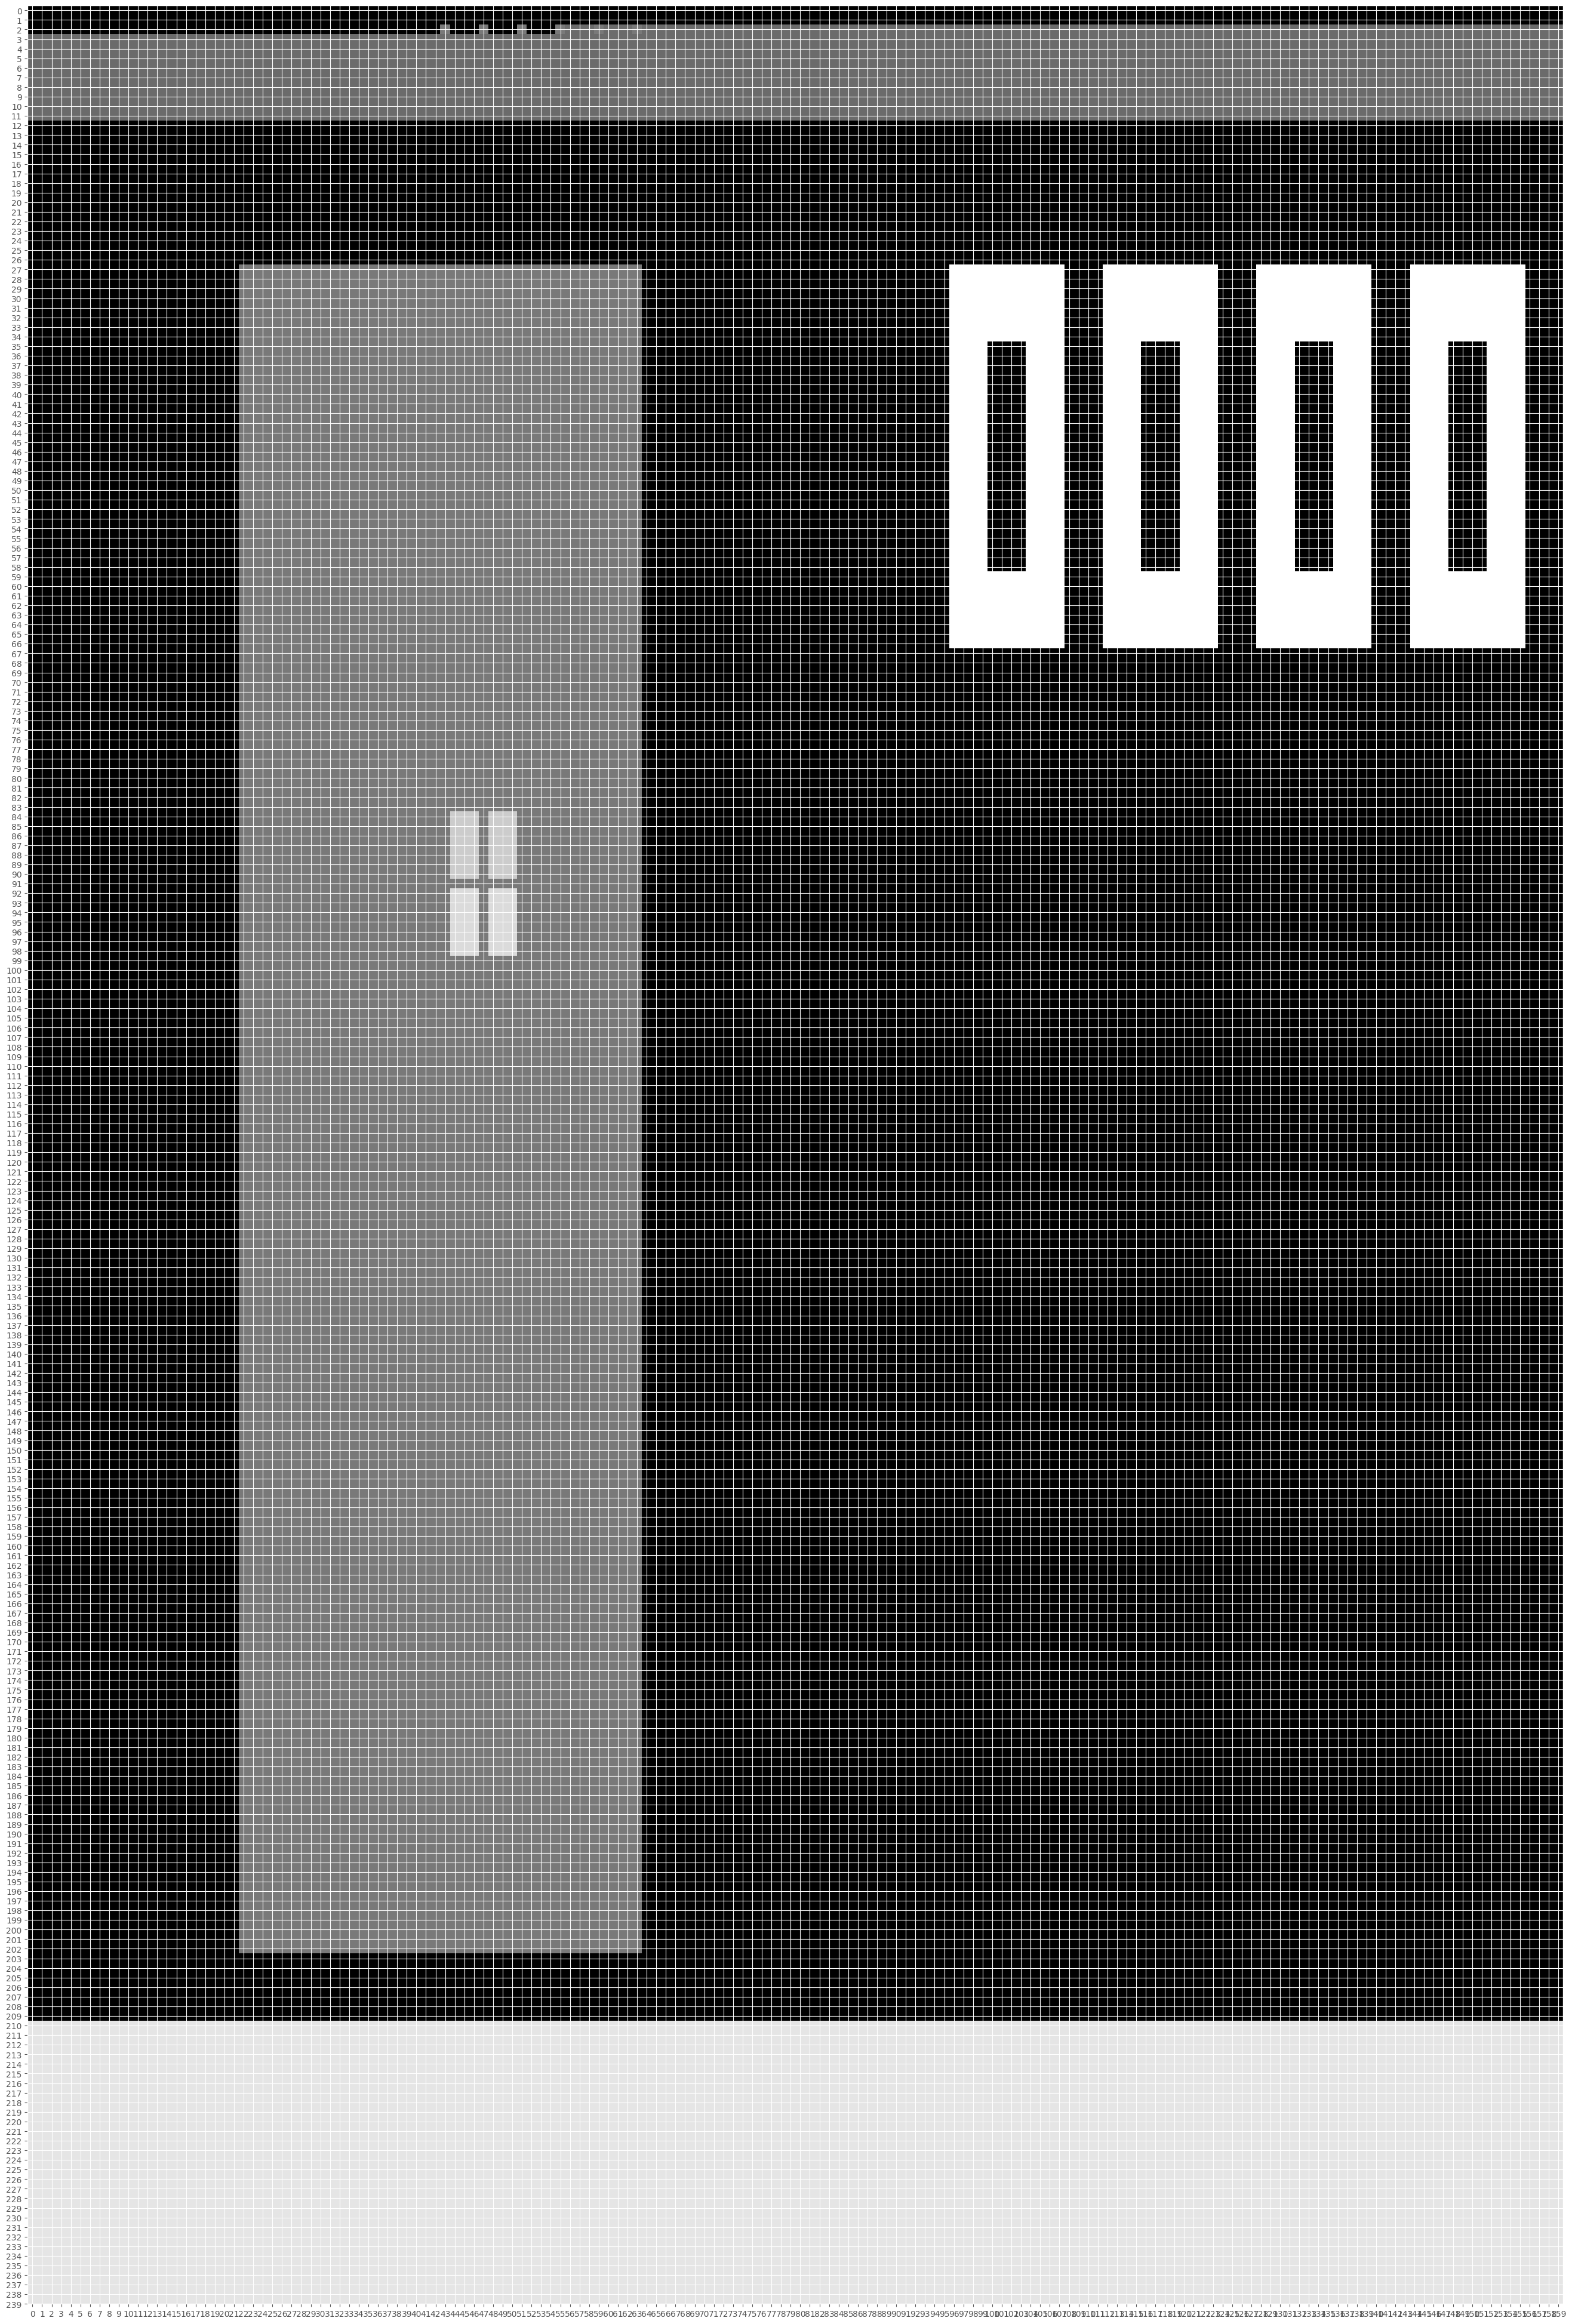

: 

In [5]:
plt.figure(figsize=(50, 50))
plt.imshow(np.array(observations[-1]), cmap="gray")
plt.xticks([x for x in range(160)]), plt.yticks([y for y in range(240)])
plt.grid(True)
